# TESLA OPTION CHAIN SIMULATION (16 JUNE 2023)

# <font color="blue"> LONG STRADDLE 

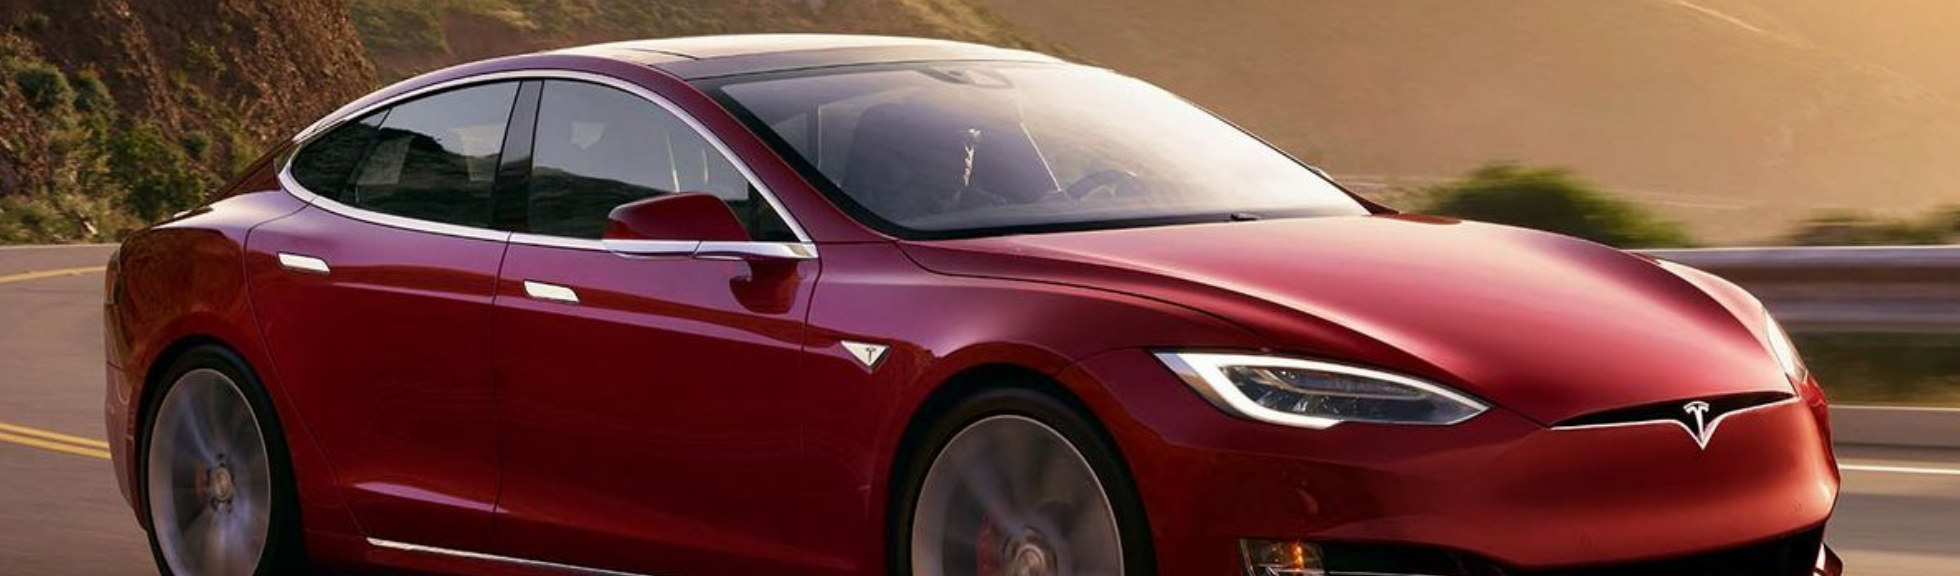

## HEMANT THAPA

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

A long straddle is an options trading strategy that involves buying both a call option and a put option with the same strike price and expiration date. This strategy is used when the trader expects a significant price movement in the underlying asset but is uncertain about the direction of the movement.

1. Buying a call option: By purchasing a call option, the trader gains the right to buy the underlying asset at the strike price within a specified time frame. This allows them to profit from an upward price movement.


2. Buying a put option: Simultaneously, the trader also buys a put option, which gives them the right to sell the underlying asset at the strike price within a specified time frame. This allows them to profit from a downward price movement.

The main idea behind a long straddle is to profit from a significant price swing, regardless of whether it goes up or down. The strategy benefits from high volatility, as a substantial price movement increases the chances of one of the options being in the money and offsetting the loss on the other option.

Long straddles are often used when traders anticipate events that can cause substantial price volatility, such as earnings announcements, regulatory decisions, or significant news releases. Traders employ this strategy to potentially capitalize on a large price move while limiting their downside risk to the initial cost of purchasing the options.

## TESLA

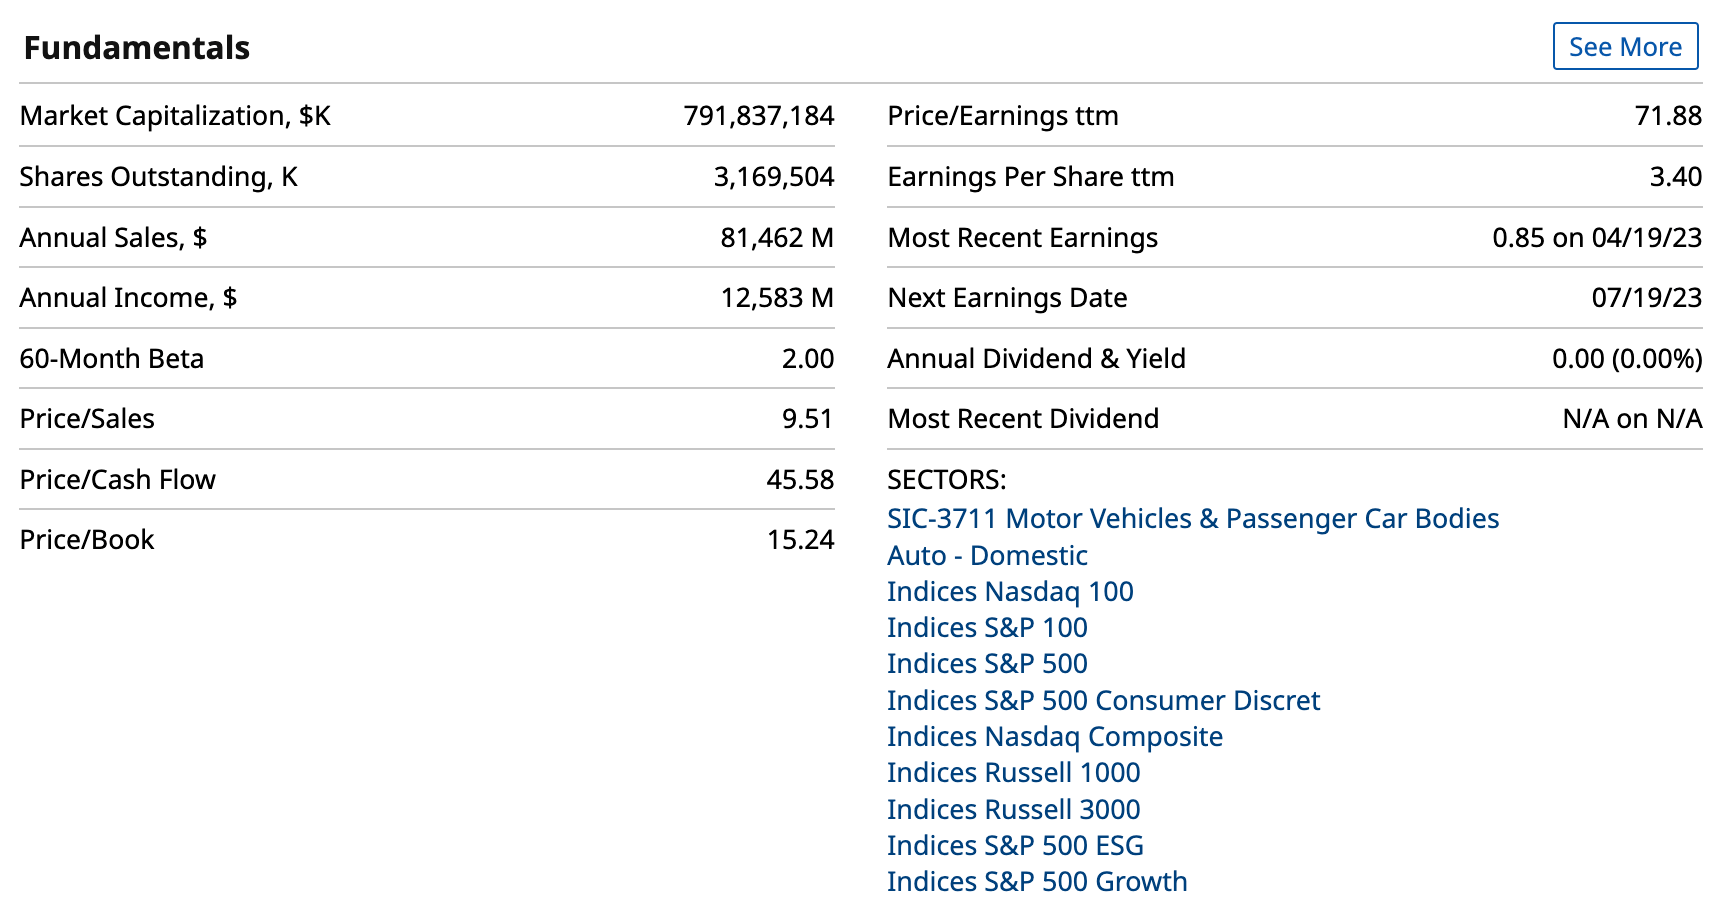

In [57]:
df = pd.read_csv(r'unusual-stock-options-activity-06-13-2023.csv')

In [58]:
tesla = df[df['Symbol']=='TSLA']

In [59]:
tesla[:10]

,Symbol,Price,Type,Strike,Exp Date,DTE,Bid,Midpoint,Ask,Last,Volume,Open Int,Vol/OI,IV,Delta,Time
7,TSLA,259.44,Put,257.50,2023-06-16,3.0,5.65,5.70,5.75,5.75,18850.0,354.0,53.25,66.36%,-0.465210,14:05 ET
12,TSLA,259.44,Put,253.33,2023-06-16,3.0,3.80,3.83,3.85,3.85,19470.0,524.0,37.16,65.40%,-0.358144,14:04 ET
13,TSLA,259.44,Put,257.50,2023-06-23,10.0,8.90,8.95,9.00,8.95,4609.0,133.0,34.65,55.82%,-0.463503,14:04 ET
19,TSLA,259.44,Call,290.00,2023-06-30,17.0,3.90,3.95,4.00,3.95,22413.0,950.0,23.59,61.48%,0.215225,14:04 ET
26,TSLA,259.44,Put,195.00,2023-11-17,157.0,9.75,9.83,9.90,9.85,9499.0,487.0,19.51,57.24%,-0.161401,13:03 ET
30,TSLA,259.44,Put,255.00,2023-06-16,3.0,4.50,4.53,4.55,4.51,29935.0,1721.0,17.39,65.27%,-0.400192,14:05 ET
35,TSLA,259.44,Put,255.00,2023-06-23,10.0,7.65,7.70,7.75,7.75,7470.0,464.0,16.10,55.80%,-0.421653,14:05 ET
39,TSLA,259.44,Call,262.50,2023-06-23,10.0,7.90,7.95,8.00,7.90,3855.0,258.0,14.94,56.46%,0.455813,14:04 ET
42,TSLA,259.44,Call,295.00,2023-06-30,17.0,3.30,3.33,3.35,3.35,10563.0,757.0,13.95,62.90%,0.185785,14:05 ET
43,TSLA,259.44,Put,252.50,2023-06-16,3.0,3.45,3.50,3.55,3.48,16907.0,1226.0,13.79,64.66%,-0.336170,14:03 ET


In [60]:
tesla['Exp Date'].unique()

array(['2023-06-16', '2023-06-23', '2023-06-30', '2023-11-17',
       '2023-07-07', '2023-07-21', '2023-07-28', '2023-08-18',
       '2023-07-14', '2023-09-15'], dtype=object)

In [61]:
tesla['Open Int'].unique()

array([  354.,   524.,   133.,   950.,   487.,  1721.,   464.,   258.,
         757.,  1226.,   465.,   113.,   135.,   611.,  3326.,  1655.,
         361.,  1442.,   134.,  3006., 10112., 22574., 16269.,   427.,
        2361.,   160.,   311.,  3122.,  2247.,   240.,   507.,  4783.,
         428.,  1588.,  2611.,   744., 11908.,  8172.,   203.,   353.,
         555.,   227.,   270.,   462.,  1948.,   696.,   808.,   184.,
        3260.,   211.,   594.,  3999.,  1446.,  1487.,   288.,   467.,
        2628.,  1725.,  2331., 15645.,   420.,  4752.,  2989., 10942.,
        8458.,  4150.,  1018.,   268.,   226.,   424.,  8943.,   381.,
         350.,  3628.,   834.,  2390.,  2580.,  1275.,   917.,  2534.,
         468.,   847., 34069.,   809.,  1333.,  8842.,   548.,  1146.,
         431.,   851.,  3733.,   533.,   632.,  1170., 25171.,   395.,
         451.])

In [62]:
class OptionPayoffCalculator:
    def __init__(self, st):
        self.st = st

    def calculate_call_payoff(self, strike_price, ask_long_call):
        return np.where(self.st > strike_price, self.st - strike_price, 0) - ask_long_call

    def calculate_put_payoff(self, strike_price, ask_long_put):
        return np.where(self.st < strike_price, strike_price - self.st, 0) - ask_long_put

class OptionPayoffPlotter:
    def __init__(self, st, payoff):
        self.st = st
        self.payoff = payoff

    def _set_ylim(self):
        max_payoff = max(self.payoff)
        min_payoff = min(self.payoff)
        ymax = max(abs(max_payoff), abs(min_payoff)) + 5
        self.ax.set_ylim(min_payoff - 500, max_payoff + 500)

    def plot(self):
        self.ax = plt.style.use('dark_background')
        self.fig, self.ax = plt.subplots(figsize=(15, 8))
        self.ax.spines['top'].set_visible(False)
        self.ax.spines['right'].set_visible(False)
        self.ax.spines['bottom'].set_position('zero')
        self.ax.grid(color='gray', linestyle='--', linewidth=0.5)
        self.ax.set_xlabel('Stock Price')
        self.ax.set_ylabel('Profit and Loss')
        self.ax.margins(x=0)

        self.ax.plot(self.st, self.payoff)
        self.ax.fill_between(self.st, 0, self.payoff, where=(self.payoff >= 0),
                             interpolate=True, alpha=0.3, color='green')
        self.ax.fill_between(self.st, 0, self.payoff, where=(self.payoff < 0),
                             interpolate=True, alpha=0.3, color='red')

        self._set_ylim()

        plt.subplots_adjust(left=0.07, right=0.95, bottom=0.07, top=0.95)
        plt.show()

    def print_final_profit(self):
        final_profit = self.payoff[-1]
        print(f"Final Profit/Loss: {final_profit}")


In [63]:
tesla_june_16 = tesla[tesla['Exp Date'] == '2023-06-16']

In [64]:
tesla_june_16

,Symbol,Price,Type,Strike,Exp Date,DTE,Bid,Midpoint,Ask,Last,Volume,Open Int,Vol/OI,IV,Delta,Time
7,TSLA,259.44,Put,257.50,2023-06-16,3.0,5.65,5.70,5.75,5.75,18850.0,354.0,53.25,66.36%,-0.465210,14:05 ET
12,TSLA,259.44,Put,253.33,2023-06-16,3.0,3.80,3.83,3.85,3.85,19470.0,524.0,37.16,65.40%,-0.358144,14:04 ET
30,TSLA,259.44,Put,255.00,2023-06-16,3.0,4.50,4.53,4.55,4.51,29935.0,1721.0,17.39,65.27%,-0.400192,14:05 ET
43,TSLA,259.44,Put,252.50,2023-06-16,3.0,3.45,3.50,3.55,3.48,16907.0,1226.0,13.79,64.66%,-0.336170,14:03 ET
59,TSLA,259.44,Call,257.50,2023-06-16,3.0,6.65,6.70,6.75,6.70,38889.0,3326.0,11.69,66.88%,0.535215,14:05 ET
71,TSLA,259.44,Put,260.00,2023-06-16,3.0,7.00,7.05,7.10,7.08,17143.0,1655.0,10.36,66.65%,-0.529083,14:05 ET
164,TSLA,259.44,Call,253.33,2023-06-16,3.0,8.95,9.00,9.05,8.95,18525.0,3006.0,6.16,65.72%,0.641685,14:05 ET
177,TSLA,259.44,Put,250.00,2023-06-16,3.0,2.68,2.69,2.70,2.68,60494.0,10112.0,5.98,64.87%,-0.277249,14:05 ET
185,TSLA,259.44,Call,260.00,2023-06-16,3.0,5.50,5.55,5.60,5.54,130663.0,22574.0,5.79,67.28%,0.472015,14:05 ET
189,TSLA,259.44,Call,255.00,2023-06-16,3.0,7.95,8.00,8.05,8.02,92347.0,16269.0,5.68,66.47%,0.598892,14:05 ET


In [65]:
tesla_june_16_put = tesla_june_16[tesla_june_16['Type']=='Put']
tesla_june_16_call = tesla_june_16[tesla_june_16['Type']=='Call']

## TESLA 16 JUNE PUT

In [66]:
tesla_june_16_put.sort_values(by='Strike')

,Symbol,Price,Type,Strike,Exp Date,DTE,Bid,Midpoint,Ask,Last,Volume,Open Int,Vol/OI,IV,Delta,Time
364,TSLA,259.44,Put,233.33,2023-06-16,3.0,0.37,0.38,0.38,0.38,7127.0,1948.0,3.66,71.00%,-0.052869,14:05 ET
841,TSLA,259.44,Put,235.00,2023-06-16,3.0,0.45,0.46,0.46,0.45,15533.0,8842.0,1.76,69.57%,-0.062188,14:04 ET
537,TSLA,259.44,Put,237.50,2023-06-16,3.0,0.60,0.61,0.62,0.60,13092.0,4752.0,2.76,67.99%,-0.080896,14:04 ET
507,TSLA,259.44,Put,240.00,2023-06-16,3.0,0.82,0.83,0.83,0.82,45248.0,15645.0,2.89,66.99%,-0.106252,14:04 ET
596,TSLA,259.44,Put,242.50,2023-06-16,3.0,1.11,1.12,1.13,1.12,10552.0,4150.0,2.54,66.23%,-0.138368,14:05 ET
474,TSLA,259.44,Put,243.33,2023-06-16,3.0,1.23,1.23,1.24,1.23,7880.0,2628.0,3.00,65.83%,-0.149952,14:05 ET
319,TSLA,259.44,Put,245.00,2023-06-16,3.0,1.50,1.51,1.52,1.50,33228.0,8172.0,4.07,65.36%,-0.176640,14:05 ET
725,TSLA,259.44,Put,246.67,2023-06-16,3.0,1.83,1.84,1.85,1.85,4849.0,2390.0,2.03,65.38%,-0.208035,14:04 ET
418,TSLA,259.44,Put,247.50,2023-06-16,3.0,2.01,2.03,2.04,2.02,13401.0,3999.0,3.35,65.04%,-0.223548,14:05 ET
177,TSLA,259.44,Put,250.00,2023-06-16,3.0,2.68,2.69,2.70,2.68,60494.0,10112.0,5.98,64.87%,-0.277249,14:05 ET


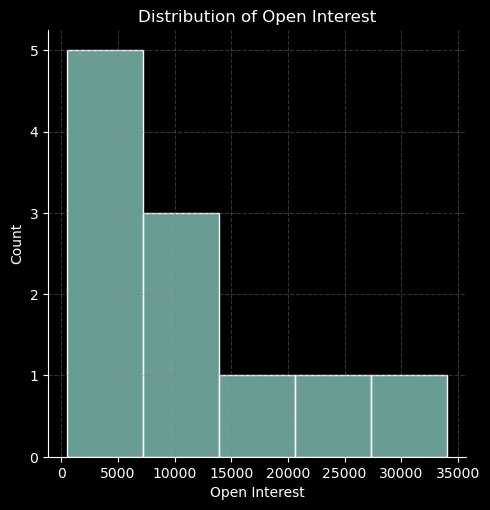

In [67]:
sns.displot(tesla_june_16_call['Open Int'])
plt.grid(linestyle="--", color="grey", alpha=0.4)
plt.xlabel('Open Interest')
plt.ylabel('Count')
plt.title('Distribution of Open Interest')
plt.show()

## TESLA 16 JUN CALL

In [68]:
tesla_june_16_call.sort_values(by='Strike')

,Symbol,Price,Type,Strike,Exp Date,DTE,Bid,Midpoint,Ask,Last,Volume,Open Int,Vol/OI,IV,Delta,Time
574,TSLA,259.44,Call,252.50,2023-06-16,3.0,9.45,9.50,9.55,9.45,22137.0,8458.0,2.62,65.46%,0.662570,14:04 ET
164,TSLA,259.44,Call,253.33,2023-06-16,3.0,8.95,9.00,9.05,8.95,18525.0,3006.0,6.16,65.72%,0.641685,14:05 ET
189,TSLA,259.44,Call,255.00,2023-06-16,3.0,7.95,8.00,8.05,8.02,92347.0,16269.0,5.68,66.47%,0.598892,14:05 ET
59,TSLA,259.44,Call,257.50,2023-06-16,3.0,6.65,6.70,6.75,6.70,38889.0,3326.0,11.69,66.88%,0.535215,14:05 ET
185,TSLA,259.44,Call,260.00,2023-06-16,3.0,5.50,5.55,5.60,5.54,130663.0,22574.0,5.79,67.28%,0.472015,14:05 ET
217,TSLA,259.44,Call,262.50,2023-06-16,3.0,4.55,4.57,4.60,4.62,16383.0,3122.0,5.25,68.13%,0.411562,14:05 ET
297,TSLA,259.44,Call,265.00,2023-06-16,3.0,3.75,3.78,3.80,3.82,50340.0,11908.0,4.23,69.24%,0.355695,14:05 ET
283,TSLA,259.44,Call,267.50,2023-06-16,3.0,3.05,3.10,3.15,3.10,6933.0,1588.0,4.37,70.33%,0.304845,14:05 ET
807,TSLA,259.44,Call,270.00,2023-06-16,3.0,2.53,2.55,2.56,2.55,62355.0,34069.0,1.83,71.61%,0.259943,14:05 ET
568,TSLA,259.44,Call,280.00,2023-06-16,3.0,1.17,1.17,1.18,1.17,28924.0,10942.0,2.64,77.07%,0.132715,14:05 ET


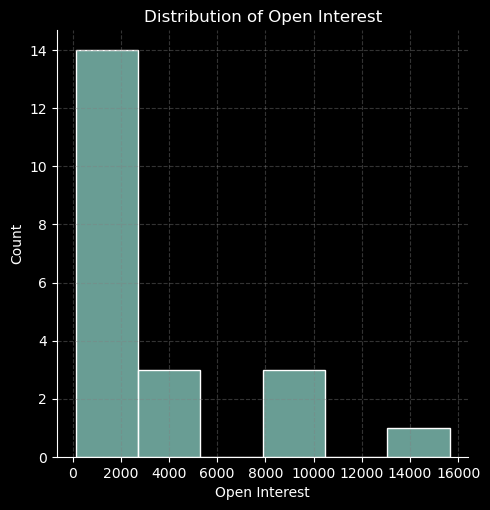

In [69]:
sns.displot(tesla_june_16_put['Open Int'])
plt.grid(linestyle="--", color="grey", alpha=0.4)
plt.xlabel('Open Interest')
plt.ylabel('Count')
plt.title('Distribution of Open Interest')
plt.show()

## LONG STRADDLE 

In [70]:
tesla = yf.Ticker("TSLA").history(period="1d", interval="15m")

In [71]:
tesla

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-06-13 09:30:00-04:00,253.949997,255.830002,253.199997,254.285004,19495258,0.0,0.0
2023-06-13 09:45:00-04:00,254.270004,254.649994,252.770004,253.190002,8691268,0.0,0.0
2023-06-13 10:00:00-04:00,253.229996,255.589996,251.830002,252.921204,9124192,0.0,0.0
2023-06-13 10:15:00-04:00,252.940002,253.490005,251.399994,252.199997,7492686,0.0,0.0
2023-06-13 10:30:00-04:00,252.179993,252.720001,251.460007,251.725204,5629981,0.0,0.0
2023-06-13 10:45:00-04:00,251.750000,253.520004,251.339996,253.330093,6612857,0.0,0.0
2023-06-13 11:00:00-04:00,253.350006,254.809998,253.240005,254.655197,6255336,0.0,0.0
2023-06-13 11:15:00-04:00,254.668198,254.970001,253.679993,254.621902,5663999,0.0,0.0
2023-06-13 11:30:00-04:00,254.634995,254.759995,253.779999,254.429993,4124501,0.0,0.0


In [72]:
tesla_june_16_put.sort_values(by='Strike').iloc[20]

Symbol            TSLA
Price           259.44
Type               Put
Strike           280.0
Exp Date    2023-06-16
DTE                3.0
Bid               22.6
Midpoint          22.7
Ask               22.8
Last             22.75
Volume           759.0
Open Int         350.0
Vol/OI            2.17
IV              76.51%
Delta        -0.870582
Time          14:03 ET
Name: 681, dtype: object

In [73]:
tesla_june_16_call.sort_values(by='Strike').iloc[9]

Symbol            TSLA
Price           259.44
Type              Call
Strike           280.0
Exp Date    2023-06-16
DTE                3.0
Bid               1.17
Midpoint          1.17
Ask               1.18
Last              1.17
Volume         28924.0
Open Int       10942.0
Vol/OI            2.64
IV              77.07%
Delta         0.132715
Time          14:05 ET
Name: 568, dtype: object

In [84]:
current_market_price = 258
print(current_market_price)

# Long put
strike_price_long_put = 280

# Premium long put
ask_long_put = 22.8

# Long call
strike_price_long_call = 280
# Premium long call
ask_long_call = 1.18

# Range at expiration of the put
st = np.arange(0, 2 * current_market_price, 1)

258


In [85]:
calculator = OptionPayoffCalculator(st)
calculator

## EXAMPLE 1

#### LONG CALL

In [86]:
payoff_long_call = calculator.calculate_call_payoff(current_market_price, ask_long_call)
plotter = OptionPayoffPlotter(st, payoff_long_call)

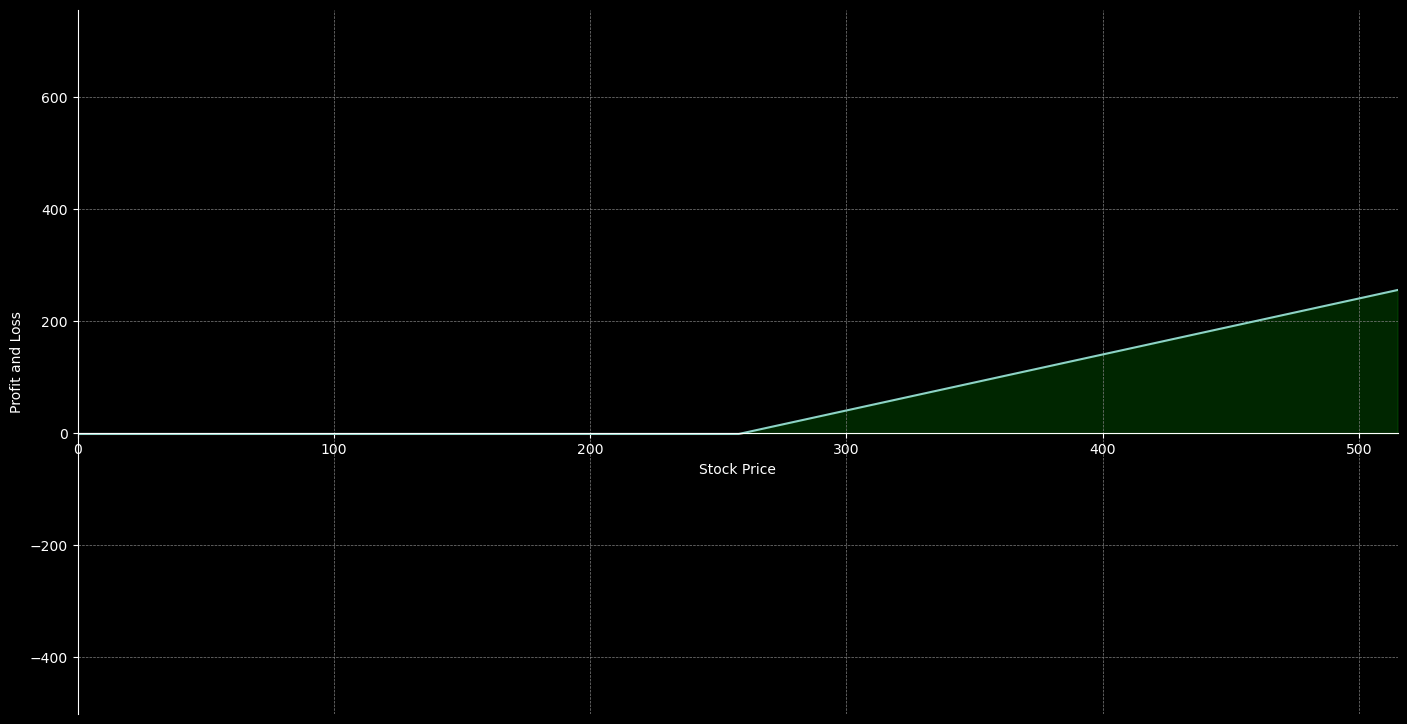

Final Profit/Loss: 255.82


In [87]:
plotter.plot()
plotter.print_final_profit()

#### LONG PUT

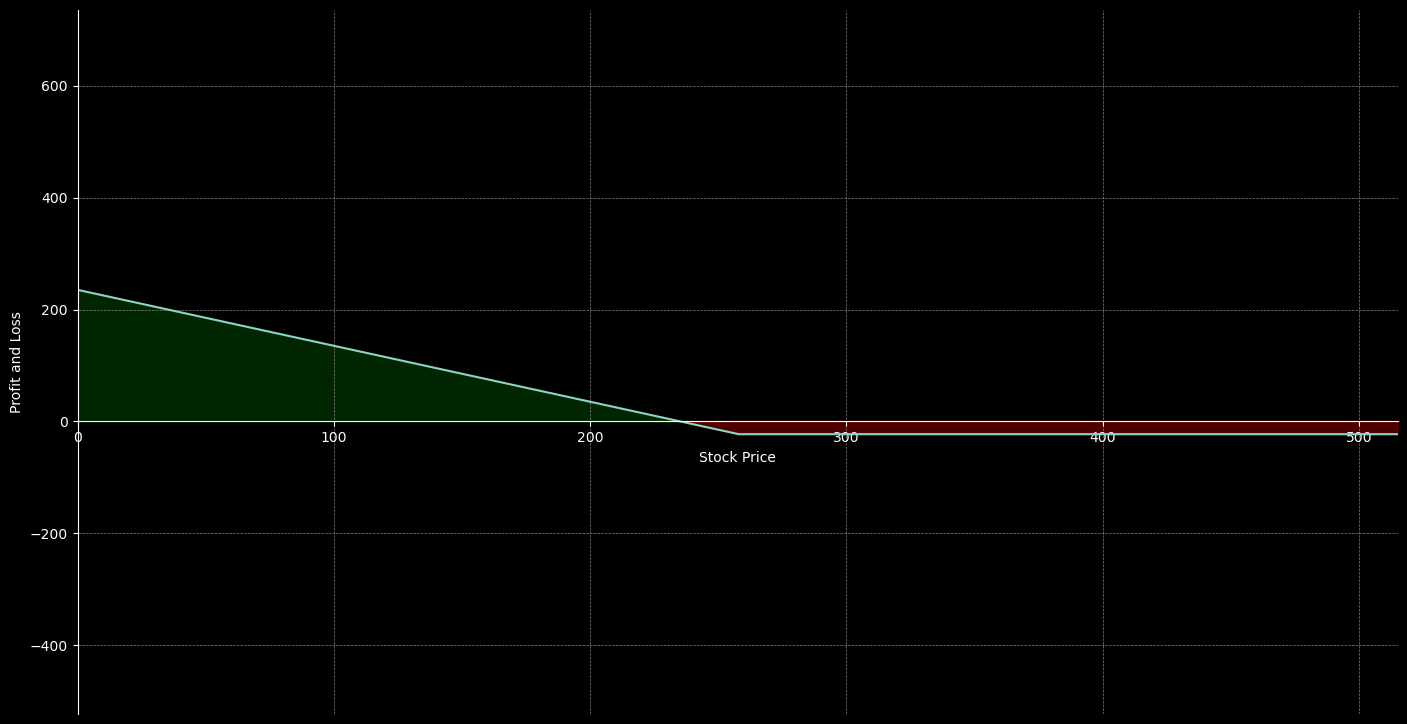

Final Profit/Loss: -22.8


In [88]:
payoff_long_put = calculator.calculate_put_payoff(current_market_price , ask_long_put)
plotter = OptionPayoffPlotter(st, payoff_long_put)
plotter.plot()
plotter.print_final_profit()

## EXAMPLE 2

In [80]:
calculator = OptionPayoffCalculator(st)  

strike_price = 260.00
ask_long_call = 5.60  

call_payoff = calculator.calculate_call_payoff(strike_price, ask_long_call)

strike_price = 260.00  
ask_long_put = 7.10  

put_payoff = calculator.calculate_put_payoff(strike_price, ask_long_put)

In [81]:
plotter = OptionPayoffPlotter(st, call_payoff + put_payoff)  

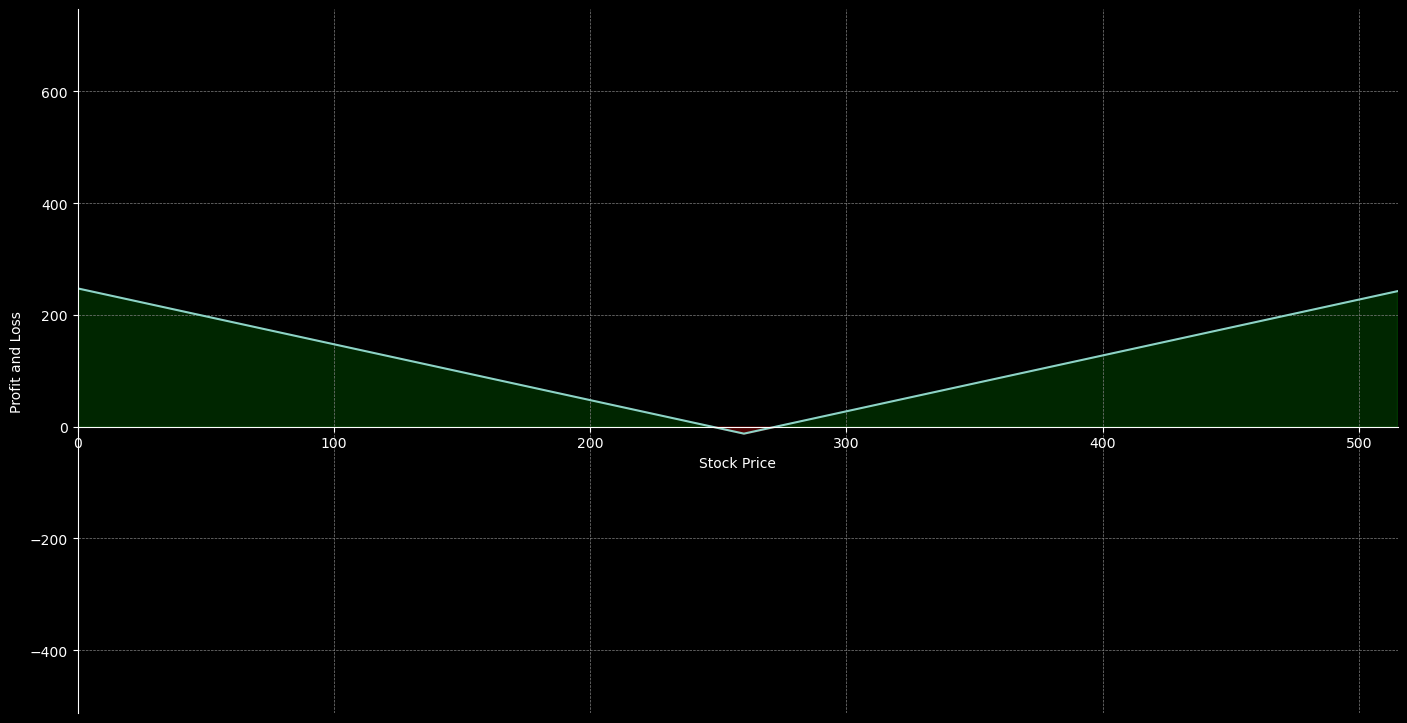

In [82]:
plotter.plot()

In [83]:
plotter.print_final_profit()

Final Profit/Loss: 242.3


## EXAMPLE 3

In [99]:
current_market_price = 258
print(current_market_price)

# Long put
strike_price_long_put = 280
ask_long_put = 22.8

# Long call
strike_price_long_call = 280
ask_long_call = 1.18

# Range at expiration
st = np.arange(0, 2 * current_market_price, 1)

258


In [100]:
#long put profit/loss
put_payoff = np.where(strike_price_long_put - st > 0, strike_price_long_put - st, 0) - ask_long_put

In [101]:
#long call profit/loss
call_payoff = np.where(st - strike_price_long_call > 0, st - strike_price_long_call, 0) - ask_long_call

In [102]:
#total profit/loss (put + call)
total_payoff = put_payoff + call_payoff

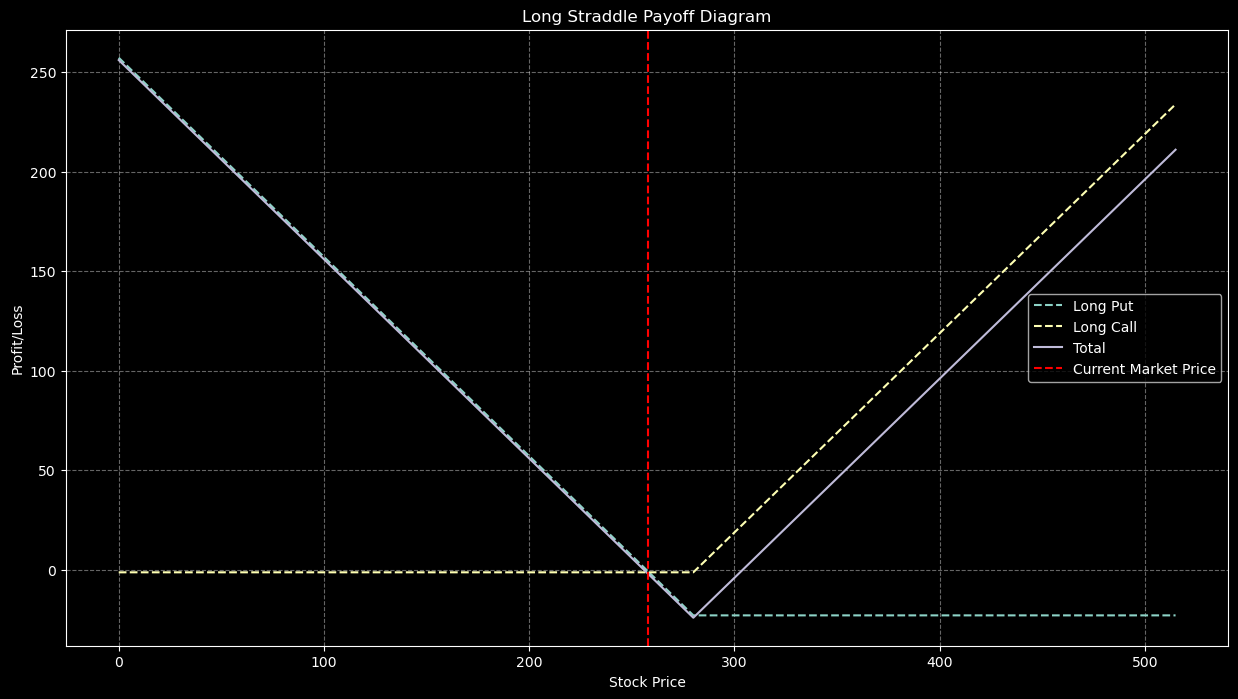

In [105]:
# Plot the payoff diagram
plt.figure(figsize=(15, 8))
plt.plot(st, put_payoff, label='Long Put', linestyle="--")
plt.plot(st, call_payoff, label='Long Call', linestyle="--")
plt.plot(st, total_payoff, label='Total')

# Add a vertical line for the current market price
plt.axvline(x=current_market_price, color='r', linestyle='--', label='Current Market Price')

plt.xlabel('Stock Price')
plt.ylabel('Profit/Loss')
plt.legend()
plt.title('Long Straddle Payoff Diagram')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()